In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 통계

### 단순 임의 추출
* df.sample()

In [3]:
df = pd.read_csv('data/students_info.csv')
df.head()

,sex,age,Mjob,Fjob
0,M,16,teacher,other
1,M,16,other,other
2,F,15,services,health
3,F,16,services,services
4,M,15,other,other


In [7]:
# 2개 추출 (n=2)
df.sample(2)

,sex,age,Mjob,Fjob
359,M,18,other,other
173,F,17,services,services


In [17]:
# 2개 추출, random_state 고정 
df.sample(frac=0.5,random_state=2)

,sex,age,Mjob,Fjob
173,F,17,services,services
205,M,17,services,services
70,F,16,other,other
118,M,15,teacher,services
32,F,15,other,other
...,...,...,...,...
276,F,18,other,other
120,F,15,teacher,services
335,F,17,services,other
144,M,16,other,other


In [18]:
#비율로 추출. frac = 추출할 비율 
df.sample(frac=0.2)

,sex,age,Mjob,Fjob
145,F,16,health,services
206,M,18,at_home,other
222,F,18,other,other
50,F,15,other,other
128,M,18,other,other
...,...,...,...,...
104,F,15,other,other
232,M,17,other,other
295,F,18,other,other
51,M,16,other,other


### Pearson 상관분석
* corr()

In [19]:
df = pd.read_csv('data/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# 상관계수 출력 
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


* pearsonr

In [26]:
# 상관계수와 p-value 구하기 - pearsonr()
from scipy.stats import pearsonr
pearsonr(df['Sepal.Length'],df['Sepal.Width'])

(-0.11756978413300188, 0.15189826071144835)

<p style="color:#fb0101;"><b>실습: df 객체의 Sepal.Length와 Petal.Length의 Pearson's 상관계수를 구하고 그 값을 반올림하여 소수점 둘째 자리까지 구하시오. </b></p>

※ 필요시 각 변수의 결측치를 제거하고 분석을 실시하시오.

In [59]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv('data/iris.csv')
df_not_na = df.loc[(df['Sepal.Length'].notna()) & (df['Petal.Length'].notna())]
c,p = pearsonr(df['Sepal.Length'],df['Petal.Length'])
round(c,2)

0.87

In [64]:
new = df.corr()
round(new.iloc[0,2],2)

0.87

### 정규성 검정

In [66]:
# 정규성 검정을 위해 
# 정규 분포인 random 자료와 비정규인 random 자료를 생성
np.random.seed(0)
df = pd.DataFrame(np.random.normal(size=500),columns=['y'])
np.random.seed(0)
df['n'] = np.random.uniform(size=500)
df

,y,n
0,1.764052,0.548814
1,0.400157,0.715189
2,0.978738,0.602763
3,2.240893,0.544883
4,1.867558,0.423655
...,...,...
495,-0.073925,0.271653
496,-0.658553,0.455444
497,-0.514234,0.401714
498,-1.018042,0.248413


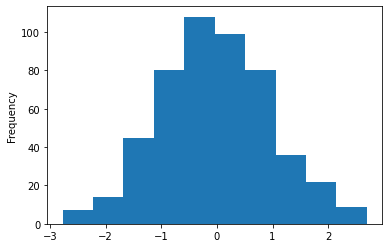

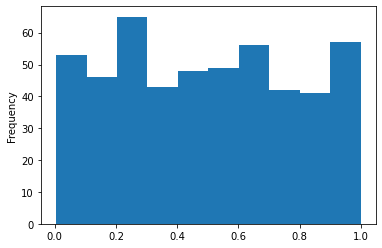

In [67]:
# y 칼럼으로 히스토그램 그려서 확인
df['y'].plot.hist()
plt.show()
# n 칼럼으로 히스토그램 그려서 확인
df['n'].plot.hist()
plt.show()

In [ ]:
# 정규성 검정 - shapiro
from scipy.stats import shapiro



### t-검정

In [70]:
df = pd.read_csv('data/iris.csv')
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
# 정규성 검정
from scipy.stats import shapiro
print('꽃받침 길이 정규성:',shapiro(df['Sepal.Length'])[1])
print('꽃받침 너비 정규성:',shapiro(df['Sepal.Width'])[1])
print('꽃잎 길이 정규성:',shapiro(df['Petal.Length'])[1])
print('꽃잎 너비 정규성:',shapiro(df['Petal.Width'])[1])

꽃받침 길이 정규성: 0.010180278681218624
꽃받침 너비 정규성: 0.10113201290369034
꽃잎 길이 정규성: 7.41295913542217e-10
꽃잎 너비 정규성: 1.680291461525485e-08


## 단일표본 :  Sepal.Width 칼럼 t-검정

In [73]:
# 3.057333 와 단일표본 t-검정 - ttest_1samp (  ) popmean = 비교 수치값
from scipy.stats import ttest_1samp

ttest_1samp(df['Sepal.Width'], popmean=3.06)

Ttest_1sampResult(statistic=-0.07493092346394424, pvalue=0.940370179817612)

## 독립표본(2표본 t-검정)  : Sepal.Width 칼럼 t-검정

In [79]:
# Species 칼럼의 setosa와 versicolor의 두 데이터를 추출하여 Sepal.Width 검정
from scipy.stats import ttest_ind
s,p=ttest_ind(df.loc[df['Species']=='setosa','Sepal.Width'],
          df.loc[df['Species']=='versicolor','Sepal.Width'],)
p

1.8452599454769322e-15

## 대응표본 : Sepal.Length 칼럼과 Petal.Length 칼럼 검정

In [81]:
from scipy.stats import ttest_rel

s,p = ttest_rel(df['Sepal.Length'],df['Petal.Length'])
p

1.7996292277334387e-50

<p style="color:#fb0101;"><b>실습: 커팅(cut)이 'Good'인 다이아몬드와 'Very Good'인 다이아몬드의 가격(price)는 유의미한 차이가 있는지 독립 2표본 t-검정으로 확인하고, 검정 결과의 p-value를 반올림하여 소수점 넷째 자리까지 구하시오.</b></p>

※ 가설검정시 별도의 값 지정이 없는 인자는 기본값을 사용하시오.

※ scipy.stats의 ttest_ind() 함수를 활용하시오.

In [4]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("data/diamonds.csv")

s,p = ttest_ind(df.loc[df['cut']=='Good','price'],
         df.loc[df['cut']=='Very Good','price'])

def solution():
    return round(p,4)

solution()

0.4188

## 일원 분산분석

In [8]:
df = pd.read_csv('data/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


* scipy.stats 로 일원 분산 분석 실시
* setosa, versicolor, virginica별 Sepal.Width 칼럼 데이터로 일원 분산 분석 실시

In [12]:
from scipy.stats import f_oneway
df1 = df.loc[df['Species']=='setosa','Sepal.Width']
df2 = df.loc[df['Species']=='versicolor','Sepal.Width']
df3 = df.loc[df['Species']=='virginica','Sepal.Width']

s,p = f_oneway(df1,df2,df3)
p # <0.5 : 귀무가설 기각

4.492017133309115e-17

* statsmodels.stats.anova 로 일원 분산 분석 실시

In [13]:
# 칼럼명에 . 을 제거하기 위해 rename
df.rename(columns={'Sepal.Width':'SW'},inplace=True)
df

,Sepal.Length,SW,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('SW ~ C(Species)',data=df).fit()
anova_lm(model)
# p-value : 4.492017e-17

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


## 2.머신러닝

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# 데이터 수집
x = [[182,167], [175,160], [181,170], [164,159], [170,153]]
y = ['큰키','중간키','중간키','작은키','작은키']

#데이터 전처리
x_train = x
y_train = [3,2,2,1,1]
x_test = [[180,165],[170,159],[180,190]]
y_test = [2,1,3]

#머신러닝 모델 생성
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

#예측
pred = model.predict(x_test)
print(pred)

#평가
accuracy_score(y_test,pred)

[2 1 2]


0.6666666666666666

### Holdout Test

In [16]:
df = pd.read_csv('data/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 훈련 데이터와 테스트 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,train_size=0.7,random_state=0)
print(len(train_df))
print(len(test_df))

105
45


In [18]:
x = df.iloc[:,:4]
y = df['Species']

x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

120 120
30 30


### 의사결정 트리

* 데이터 수집 및 전처리

In [20]:
df = pd.read_csv('data/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size=0.8,random_state=0)
print(len(df_train),len(df_test))

120 30


시험에서는 train_test_split 방식으로 자료를 추출하지 않으므로 실습을 위해 자료를 섞어서 특정 위치까지의 레코드를 가져올 수 있도록 함

In [23]:
# 무작위로 자료 섞기
from sklearn.utils import shuffle
df = shuffle(df, random_state=0).reset_index(drop=True)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...
145,4.9,3.1,1.5,0.1,setosa
146,6.3,2.9,5.6,1.8,virginica
147,5.8,2.7,4.1,1.0,versicolor
148,7.7,3.8,6.7,2.2,virginica


In [26]:
#데이터 변환
df['y'] = 0
df.loc[df['Species'] == 'virginica','y'] = 0
df.loc[df['Species'] == 'versicolor','y'] = 1
df.loc[df['Species'] == 'virginica','y'] = 2

In [33]:
# 독립변수 x와 종속 변수 y로 나누기
from sklearn.model_selection import train_test_split
# 훈련 데이터
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)
# 테스트 데이터
x_test = x.iloc[80,:]
y_test = x.iloc[80,:]

* 모델 생성

In [30]:
from sklearn.tree import DecisionTreeClassifier

# 모델 객체 생성 및 훈련
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

* 예측 및 평가

In [31]:
#예측하기
pred  = DT.predict(x_test)

In [34]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

ValueError: Found input variables with inconsistent numbers of samples: [4, 30]

### 분류 모델의 평가지표

In [42]:
#의사결정 나무 머신러닝 모델 생성
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle

df = sns.load_dataset('penguins')
df.drop(df[df['species']=='Gentoo'].index,inplace=True)
df.dropna(subset=['body_mass_g'],inplace=True)
df = shuffle(df).reset_index(drop=True)

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,50.5,19.6,201.0,4050.0,Male
1,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male
2,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
3,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
4,Chinstrap,Dream,46.1,18.2,178.0,3250.0,Female
...,...,...,...,...,...,...,...
214,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
215,Adelie,Biscoe,42.7,18.3,196.0,4075.0,Male
216,Adelie,Dream,37.0,16.5,185.0,3400.0,Female
217,Adelie,Torgersen,36.6,17.8,185.0,3700.0,Female


* 데이터 전처리 및 모델 생성

In [66]:
from sklearn.tree import DecisionTreeClassifier

# 1. species 칼럼 값이 Chinstrap이면 1로 Adelie이면 0으로 변환
df.loc[df['species']=='Chinstrap','species'] = 1
df.loc[df['species']=='Adelie','species'] = 0
# 2. bill_length_mm, body_mass_g를 독립변수로 species를 종속변수로  

x = df[['bill_length_mm','body_mass_g']]
y = df['species'].astype("int")

# 3. 훈련 데이터, 테스트 데이터 분리 (훈련데이터 상위 170개로 설정)
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

# 4. 모델 생성
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
# 5. 예측
pred = DT.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

* 분할표(오차행렬)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[29,  0],
       [ 1, 14]], dtype=int64)

* 정확도

In [69]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,pred),2)

0.98

* 정밀도

In [70]:
from sklearn.metrics import precision_score

precision_score(y_test,pred)

1.0

* 재현율

In [71]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.9333333333333333

* f1 score

In [72]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)

0.9655172413793104

### 선형 회귀 분석

In [ ]:
df = pd.read_csv('diamonds.csv')
df.info()

In [ ]:
df.corr()

* sklearn 활용

In [ ]:
from sklearn.linear_model import LinearRegression

x= df[['carat']]
y = df['price']

# 훈련 데이터는 x,y 전체로 설정


# 테스트 데이터는 x,y의 상위 4개까지 

#모델 생성 및 훈련

#예측


In [ ]:
#회귀계수(coef_)와 절편(intercept_)


* statsmodels 활용

In [ ]:
from statsmodels.formula.api import ols

df = pd.read_csv('diamonds.csv')

model = ols(formula='price ~ carat',data=df).fit()
model.summary()

In [ ]:
pred = model.predict(x_test)
pred

In [ ]:
#결정계수
model.rsquared

In [ ]:
#절편과 회귀계수 
model.params

### 회귀 모델의 평가지표

* MSE 평가

In [ ]:
from sklearn.metrics import mean_squared_error


* MAE 평가

In [ ]:
from sklearn.metrics import mean_absolute_error


* MAPE 평가

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error


* MSE 평가

In [ ]:
from sklearn.metrics import mean_squared_error


* RMSE 평가

* R2 Score

In [ ]:
from sklearn.metrics import r2_score


<p style="color:#fb0101;"><b>실습: df 객체의 price변수를 종속변수로 하고 x,y,z 데이터를 독립변수로 하여 다중선형회귀를 실시하고 절편을 반올림하여 소수점 둘째 자리까지 표기하시오</b></p>

※ sklearn의 LinearRegression함수를 활용하여 다중선형회귀를 실시하시오.

※ 필요시 각 변수의 결측치를 제거하고 분석을 실시하시오.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('diamonds.csv')
def solution():
    return 1
    
solution()

### 이항 로지스틱 회귀 분석

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

* sklearn 활용

In [ ]:
from sklearn.linear_model import LogisticRegression

x= df[['SkinThickness','Insulin','BMI']]
y = df['Outcome']

x_train = x.iloc[:500,]
y_train = y.iloc[:500,]
x_test = x.iloc[500:,]
y_test = y.iloc[500:,]

model = LogisticRegression(random_state=0).fit(x_train,y_train)
pred = model.predict(x_test)
pred

In [ ]:
print(model.coef_, model.intercept_)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

* statsmodels 활용

In [ ]:
from statsmodels.api import Logit

model = Logit(exog=x_train, endog=y_train).fit()
model.summary()

In [ ]:
#model = LogisticRegression(fit_intercept = False, C = 1e9,random_state=0).fit(x_train,y_train)

In [ ]:
pred = model.predict(x_test)
pred

In [ ]:
new_pred = (pred>0.5)+0
new_pred

In [ ]:
accuracy_score(y_test,new_pred)

### 유클리드 거리 계산

In [ ]:
arr1 = np.array([0,5,2])
arr2 = np.array([1,5,4])
print(np.sqrt(sum((arr1-arr2)**2)))
print(sum((arr1-arr2)**2)**0.5)

In [ ]:
# 유클리드 거리 계산 - distance.euclidean()
from scipy.spatial import distance


### k-means 군집 분석

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

In [ ]:
from sklearn.cluster import KMeans

x = df.iloc[:,:-1]

model = KMeans(n_clusters = 3,random_state=0).fit(x)

In [ ]:
#분류된 군집 출력


In [ ]:
# 군집 번호를 데이터프레임에 추가


In [ ]:
# 군집과 Species 구성 groupby로 비교해보기


In [ ]:
df.plot.scatter(x='Sepal.Length',y='Petal.Length',
                c = df['cluster'], colormap='viridis')
plt.show()

### 계층적 군집 분석

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
x = df.iloc[:,:-1]
model = AgglomerativeClustering(n_clusters=3).fit(x)

In [ ]:
#분류된 군집 출력
model.labels_

In [ ]:
df['cluster'] = model.labels_
df.groupby('cluster').mean()

In [ ]:
import scipy.cluster.hierarchy as shc

data = df.iloc[:,:4].values
link = shc.linkage(data, method='ward')
dend = shc.dendrogram(link)